In [62]:
import matplotlib.pyplot as plt
import numpy as np
import random as rd

In [63]:
from sklearn.metrics import r2_score

# Linear Model to fit the curve

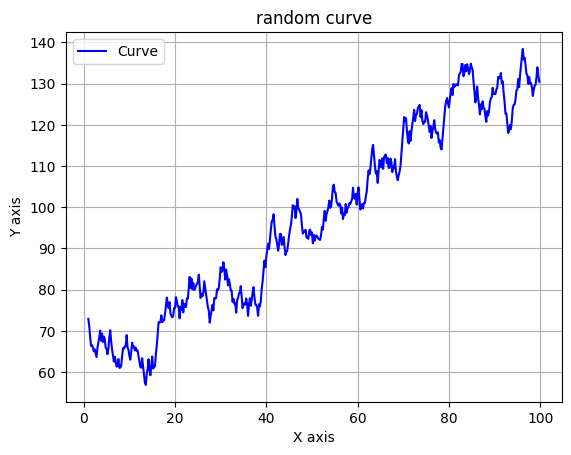

In [73]:
X = np.arange(1, 100, 0.2).reshape(-1, 1)
X1 = np.arange(100, 200, 0.2).reshape(-1, 1)
Y = []
y = rd.randint(50, 100)
for i in range(len(X)):
    y += rd.uniform(-3, 3)
    Y.append(y)
Y1 = []
for i in range(len(X1)):
    y += rd.uniform(-3, 3)
    Y1.append(y)

plt.plot(X, Y, color='b', label='Curve')
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("random curve")
plt.grid()
plt.legend()
plt.show()


In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
print(len(X))
print(X.shape)

495
(495, 1)


In [76]:
LR = LinearRegression()
LR.fit(X, Y)

LinearRegression()

In [77]:
a = LR.coef_
b = LR.intercept_

y_pred_LR = LR.predict(X)

print(f"R2 score of {r2_score(Y, y_pred_LR)}")
print(f"Coefficient: {a}")
print(f"Intercept: {b}")

R2 score of 0.9490929665446965
Coefficient: [0.7876025]
Intercept: 57.54849530194119


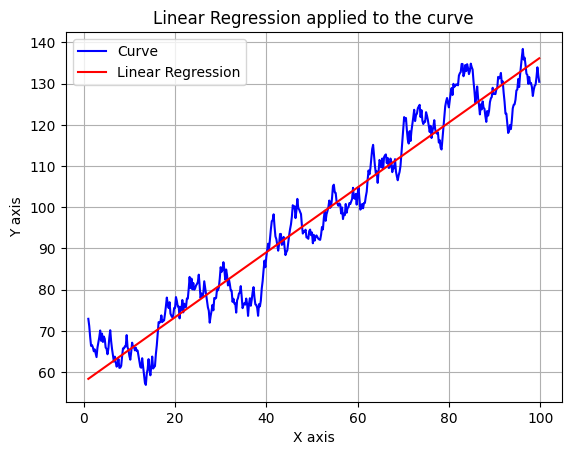

In [78]:
lr = []
for i in range(len(X)):
    lr.append(a*X[i] + b)

plt.plot(X, Y, color='b', label='Curve')
plt.plot(X, lr, color='r', label='Linear Regression')
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Linear Regression applied to the curve")
plt.grid()
plt.legend()
plt.show()


# Non-linear model to fit the curve

In [79]:
from sklearn.neural_network import MLPRegressor

MLPR = MLPRegressor(hidden_layer_sizes=(1000, 500, 200, 20), activation="relu",
                 solver='adam', alpha=0.0001,
                 batch_size='auto', learning_rate="constant",
                 learning_rate_init=0.001,
                 max_iter=1000,tol=1e-4)
MLPR.fit(X, Y)


MLPRegressor(hidden_layer_sizes=(1000, 500, 200, 20), max_iter=1000)

In [80]:
X_MLP = np.arange(1, 200, 0.2).reshape(-1, 1)

In [81]:
y_MLP = MLPR.predict(X_MLP)

In [82]:
print(f"R2 score on the trained part of the curve (0 <= X <= 100): {r2_score(Y, y_MLP[:495])}")
print(f"R2 score on the untrained part of the curve (100 <= X <= 200): {r2_score(Y1, y_MLP[495:])}")

R2 score on the trained part of the curve (0 <= X <= 100): 0.9482375212421993
R2 score on the untrained part of the curve (100 <= X <= 200): -17.9604143220054


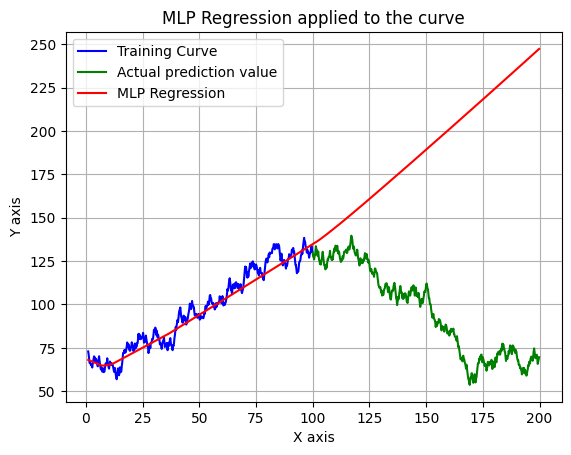

In [83]:
plt.plot(X, Y, color='b', label='Training Curve')
plt.plot(X1, Y1, color='g', label='Actual prediction value')
plt.plot(X_MLP, y_MLP, color='r', label='MLP Regression')
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("MLP Regression applied to the curve")
plt.grid()
plt.legend()
plt.show()
